In [1]:
import osgeo
import os
from os.path import join as pjoin
import rioxarray
import numpy as np
#import matplotlib as plt
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
from rasterio import features
import pandas as pd
import rasterio



import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns


scratch_dir = './data' 

# Train NDSI

In [97]:
tss = rioxarray.open_rasterio(pjoin(scratch_dir, 'train_data_resampledNDSI.tif'))
tss


<xarray.DataArray (band: 1, y: 4862, x: 3159)>
[15359058 values with dtype=float64]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 86.44 86.44 86.44 86.44 ... 87.42 87.42 87.42 87.42
  * y            (y) float64 28.2 28.2 28.2 28.19 ... 26.87 26.87 26.87 26.87
    spatial_ref  int32 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    long_name:     stackstac-b10b98b7310f40e9276d61875e49715a

In [98]:
tss.coords['band'] = tss.coords['band']+1991

In [99]:
tss = tss.dropna(dim = 'band', how = 'all')

In [100]:
tss

<xarray.DataArray (band: 1, y: 4862, x: 3159)>
array([[[ 0.078177,  0.089016, ..., -0.121222, -0.108034],
        [-0.033818,  0.006755, ..., -0.124718, -0.125626],
        ...,
        [-0.208574, -0.203931, ..., -0.145662, -0.128123],
        [-0.192067, -0.185568, ..., -0.13079 , -0.109967]]])
Coordinates:
  * band         (band) int32 1992
  * x            (x) float64 86.44 86.44 86.44 86.44 ... 87.42 87.42 87.42 87.42
  * y            (y) float64 28.2 28.2 28.2 28.19 ... 26.87 26.87 26.87 26.87
    spatial_ref  int32 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    long_name:     stackstac-b10b98b7310f40e9276d61875e49715a

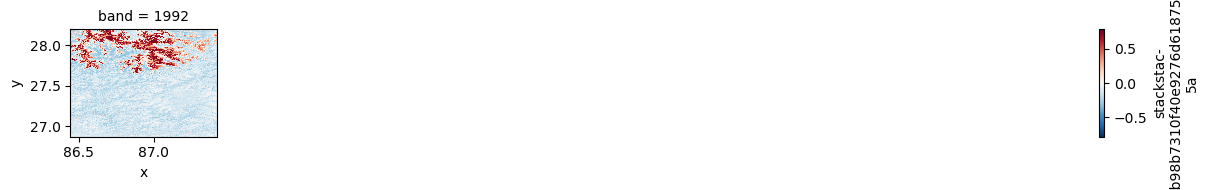

In [101]:
tss.plot.imshow(col="band",  col_wrap=6, size=2)

In [102]:
aoi = gpd.read_file("data/Train/classifications/Classifications.shp")
aoi = aoi[['layer', 'is_glacier', 'geometry']]
# aoi.is_glacier = aoi.is_glacier.astype(str)
print (aoi.tail())

                layer  is_glacier  \
80  Rivier Dnudh Kosi           0   
81               Rots           0   
82               Rots           0   
83               Rots           0   
84               Rots           0   

                                             geometry  
80  POLYGON ((86.71343 27.72815, 86.71342 27.72814...  
81  POLYGON ((86.82155 28.19028, 86.82148 28.19008...  
82  POLYGON ((86.86028 28.14301, 86.85935 28.14468...  
83  POLYGON ((87.33841 28.14561, 87.33048 28.14714...  
84  POLYGON ((86.47362 28.13161, 86.47442 28.13208...  


In [103]:
file_location = 'data/train_data_resampledNDSI.tif'
d = rioxarray.open_rasterio(file_location).squeeze() 

d  # Show data information

<xarray.DataArray (y: 4862, x: 3159)>
[15359058 values with dtype=float64]
Coordinates:
    band         int32 1
  * x            (x) float64 86.44 86.44 86.44 86.44 ... 87.42 87.42 87.42 87.42
  * y            (y) float64 28.2 28.2 28.2 28.19 ... 26.87 26.87 26.87 26.87
    spatial_ref  int32 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    long_name:     stackstac-b10b98b7310f40e9276d61875e49715a

c:\Users\k\anaconda3\envs\ssml\lib\site-packages\geopandas\plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


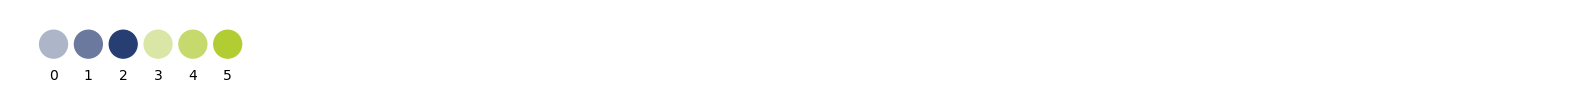

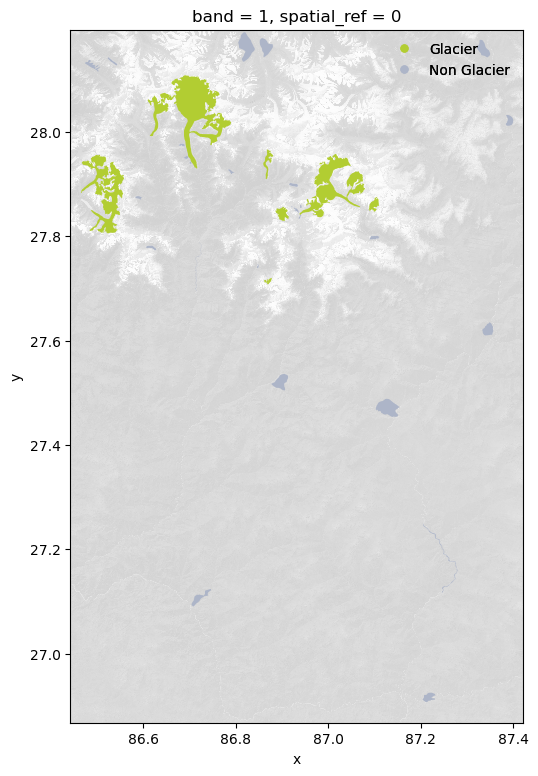

In [104]:
# Below is a visualization of the sample LULC areas superimposed on a satellite image of part of the Netherlands

# We also prepare the color codes for visualization
colors = [(257, 71, 27), (98, 93, 78)]
cols = []
for col in colors:
    pal = sns.light_palette(col, input="husl", n_colors=4)
    for rgb in pal[1:]:
        cols.append(rgb)

# A preview of color codes. Please delete the triple quotation marks to run the code.

fig, ax = plt.subplots(figsize=(20, 5))
for i, c in enumerate(cols):
    ax.add_artist(plt.Circle((i, 0), 0.4, color=c))
    plt.text(i, -1, i, horizontalalignment='center')
    ax.set_axis_off()
    ax.set_aspect(1)
    ax.autoscale()
    plt.xlim(-1.25,43.25)
    plt.ylim(-1,1)


# Assign color codes to LULC types 
symbology = {'Glacier': cols[5],
             'Non Glacier': cols[0]}

# Assign color codes to LULC types 
symbology1 = {1: cols[5],
              0: cols[0]}

# Visualize
fig,ax = plt.subplots(1,1, figsize=(9,9))
d.plot(ax=ax, cmap='gray', alpha=0.25, add_colorbar=False)  # Plot the satellite image
aoi.plot(ax=ax, column='is_glacier', legend=True, color=aoi['is_glacier'].map(symbology1))


custom_points = [Line2D([0], [0], marker="o", linestyle="none", markersize=5, color=color) for color in symbology1.values()]
leg_points = ax.legend(custom_points, symbology.keys(), loc='upper right', frameon=False)
ax.add_artist(leg_points)


In [105]:
aoi = gpd.read_file("data/Train/classifications/Classifications.shp")
aoi = aoi[['layer', 'is_glacier', 'geometry']]

aoi['is_glacier'].loc[aoi['is_glacier']==0] = 2
aoi

,layer,is_glacier,geometry
0,Barun,1,"POLYGON ((86.99117 27.88994, 86.99123 27.89032..."
1,Barun,1,"POLYGON ((86.98462 27.89381, 86.98466 27.89437..."
2,Barun,1,"POLYGON ((87.01963 27.95332, 87.02055 27.95233..."
3,Barun,1,"POLYGON ((87.02968 27.94483, 87.02972 27.94504..."
4,Barun,1,"POLYGON ((86.99370 27.91944, 86.99363 27.91984..."
...,...,...,...
80,Rivier Dnudh Kosi,2,"POLYGON ((86.71343 27.72815, 86.71342 27.72814..."
81,Rots,2,"POLYGON ((86.82155 28.19028, 86.82148 28.19008..."
82,Rots,2,"POLYGON ((86.86028 28.14301, 86.85935 28.14468..."
83,Rots,2,"POLYGON ((87.33841 28.14561, 87.33048 28.14714..."


In [106]:
# Labels from the AOIs
aoi['aoi_cat'] = pd.Categorical(aoi['is_glacier'])

# Rasterize
rst = rasterio.open('data/train_data_resampledNDSI.tif')  # Base image to rasterize the *.shp
meta = rst.meta.copy()  # Copy metadata from the base image
meta.update(compress='lzw')

# Burn the AOIs *.shp file into raster and save it
out_rst = 'data/train/aoi_rasterized.tif'
with rasterio.open(out_rst, 'w+', **meta) as out:
    out_arr = out.read(1)

    # Create a generator of geom, value pairs to use in rasterizing
    shapes = ((geom,value) for geom, value in zip(aoi.geometry, aoi.aoi_cat))

    burned = features.rasterize(shapes=shapes, fill=0, out=out_arr, transform=out.transform)
    out.write_band(1, burned)

In [107]:
stack = np.array([])

print(d.shape)  # Each time, also check the size of the image
    
# In order to do clustering, image should be reshaped into a single column
band_col = d.values.reshape(-1, 1)
   
# Each time put the reshaped image into the stack
stack = np.hstack((stack, band_col)) if stack.size else band_col
# Also to check the size of the stack
print(stack.shape)

(4862, 3159)
(15359058, 1)


In [108]:
# Load the rasterized LULC types in the AOI and concatenate it together with the images

aoi_rst = rasterio.open('data/train/aoi_rasterized.tif').read(1)

# Stack the label with the input bands
data = np.c_[stack, aoi_rst.reshape(-1,)]

# Of course, we are only interested in pixels with LULC type labelled
data = data[np.where(data[:,data.shape[1]-1]!=0)]
#print(data)

# Recall our function for preparing training and test datasets.
# This time we re-write it a little bit to let the users of the function to split the data into training and test sets.
training_proportion = 0.3
np.random.shuffle(data)  # Shuffle the data so that LULC types can spread over training and test sets
X_train = data[:int(training_proportion*len(data)), :1]  # 70% of data for training
X_test = data[int(training_proportion*len(data)):, :1]  # 30% for testing
Y_train = data[:int(training_proportion*len(data)), 1:].reshape(-1,)  # 70% of data for training
print(Y_train)
Y_test = data[int(training_proportion*len(data)):, 1:].reshape(-1,)  # 30% for testing


[2. 1. 2. ... 1. 1. 1.]


In [ ]:
for y in Y_train:
    print(y)

In [109]:
aoi['is_glacier'].loc[aoi['is_glacier'] == 1] = 'Glacier'
aoi['is_glacier'].loc[aoi['is_glacier'] == 2] = 'Non Glacier'
aoi

C:\Users\k\AppData\Local\Temp\ipykernel_10968\2742753793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aoi['is_glacier'].loc[aoi['is_glacier'] == 1] = 'Glacier'


,layer,is_glacier,geometry,aoi_cat
0,Barun,Glacier,"POLYGON ((86.99117 27.88994, 86.99123 27.89032...",1
1,Barun,Glacier,"POLYGON ((86.98462 27.89381, 86.98466 27.89437...",1
2,Barun,Glacier,"POLYGON ((87.01963 27.95332, 87.02055 27.95233...",1
3,Barun,Glacier,"POLYGON ((87.02968 27.94483, 87.02972 27.94504...",1
4,Barun,Glacier,"POLYGON ((86.99370 27.91944, 86.99363 27.91984...",1
...,...,...,...,...
80,Rivier Dnudh Kosi,Non Glacier,"POLYGON ((86.71343 27.72815, 86.71342 27.72814...",2
81,Rots,Non Glacier,"POLYGON ((86.82155 28.19028, 86.82148 28.19008...",2
82,Rots,Non Glacier,"POLYGON ((86.86028 28.14301, 86.85935 28.14468...",2
83,Rots,Non Glacier,"POLYGON ((87.33841 28.14561, 87.33048 28.14714...",2


In [110]:
symbology

{'Glacier': (0.6974686945104636, 0.8028943929168681, 0.19558862125361637),
 'Non Glacier': (0.6784463372420639, 0.709895946274658, 0.7827866176656862)}

                 y
0      Non Glacier
1          Glacier
2      Non Glacier
3          Glacier
4          Glacier
...            ...
98611      Glacier
98612      Glacier
98613      Glacier
98614      Glacier
98615      Glacier

[98616 rows x 1 columns]


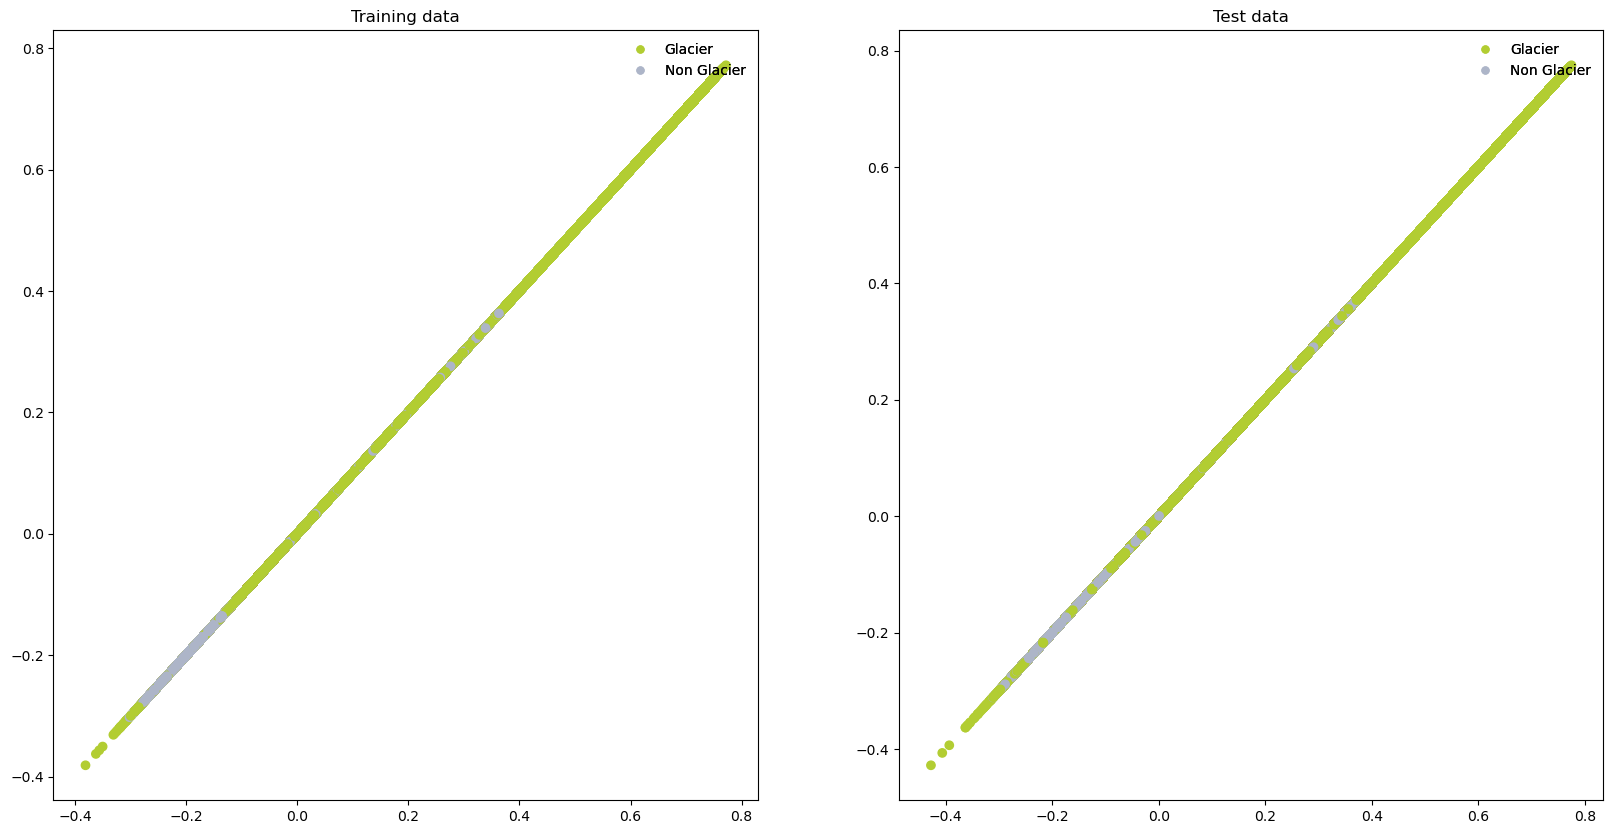

In [111]:
# Visualize the training and test datasets

# Assign color codes to LULC types for visualizing the datasets
# We take advantage of the categorical code from the AOI to map training and test data into explicit LULC names
classes = aoi.loc[:,['is_glacier', 'aoi_cat']].drop_duplicates()
class_dict = {k:v for k,v in zip(classes.aoi_cat, classes.is_glacier)}
Y_train_categ = np.array([class_dict[y] for y in Y_train])
Y_test_categ = np.array([class_dict[y] for y in Y_test])

# Visualize

fig1,(ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

df1 = pd.DataFrame(Y_train_categ, columns = ['y'])
print(df1)
ax1.scatter(X_train[:, 0], X_train[:, 0], c=df1['y'].map(symbology), label='LULC types')
ax1.set_title('Training data')

custom_points = [Line2D([0], [0], marker="o", linestyle="none", markersize=5, color=color) for color in symbology.values()]
leg_points = ax1.legend(custom_points, symbology.keys(), loc='upper right', frameon=False)
ax1.add_artist(leg_points)

df2 = pd.DataFrame(Y_test_categ, columns = ['y'])
ax2.scatter(X_test[:, 0], X_test[:, 0], c=df2['y'].map(symbology), label='LULC types')
ax2.set_title('Test data')

custom_points = [Line2D([0], [0], marker="o", linestyle="none", markersize=5, color=color) for color in symbology.values()]
leg_points = ax2.legend(custom_points, symbology.keys(), loc='upper right', frameon=False)
ax2.add_artist(leg_points)

# GridSearch for Decision Tree

In [158]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


# Create a decision tree object
dt = DecisionTreeClassifier()

# Define the hyperparameter grid
param_grid = {'max_depth': [2, 4, 6, 8, 10],
              'min_samples_split': [2, 4, 6, 8, 10],
              'min_samples_leaf': [1, 2, 3, 4, 5]}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)


Best hyperparameters:  {'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}


# Decision Tree with best parameters

[Text(0.5, 0.9, 'x[0] <= -0.106\ngini = 0.355\nsamples = 98616\nvalue = [75850, 22766]'),
 Text(0.25, 0.7, 'x[0] <= -0.149\ngini = 0.348\nsamples = 21475\nvalue = [4813, 16662]'),
 Text(0.125, 0.5, 'x[0] <= -0.254\ngini = 0.272\nsamples = 16006\nvalue = [2595, 13411]'),
 Text(0.0625, 0.3, 'x[0] <= -0.273\ngini = 0.5\nsamples = 931\nvalue = [451, 480]'),
 Text(0.03125, 0.1, 'gini = 0.392\nsamples = 288\nvalue = [211, 77]'),
 Text(0.09375, 0.1, 'gini = 0.468\nsamples = 643\nvalue = [240, 403]'),
 Text(0.1875, 0.3, 'x[0] <= -0.167\ngini = 0.244\nsamples = 15075\nvalue = [2144, 12931]'),
 Text(0.15625, 0.1, 'gini = 0.224\nsamples = 12369\nvalue = [1593, 10776]'),
 Text(0.21875, 0.1, 'gini = 0.324\nsamples = 2706\nvalue = [551, 2155]'),
 Text(0.375, 0.5, 'x[0] <= -0.126\ngini = 0.482\nsamples = 5469\nvalue = [2218, 3251]'),
 Text(0.3125, 0.3, 'x[0] <= -0.134\ngini = 0.438\nsamples = 2885\nvalue = [933, 1952]'),
 Text(0.28125, 0.1, 'gini = 0.425\nsamples = 1830\nvalue = [560, 1270]'),
 Text(

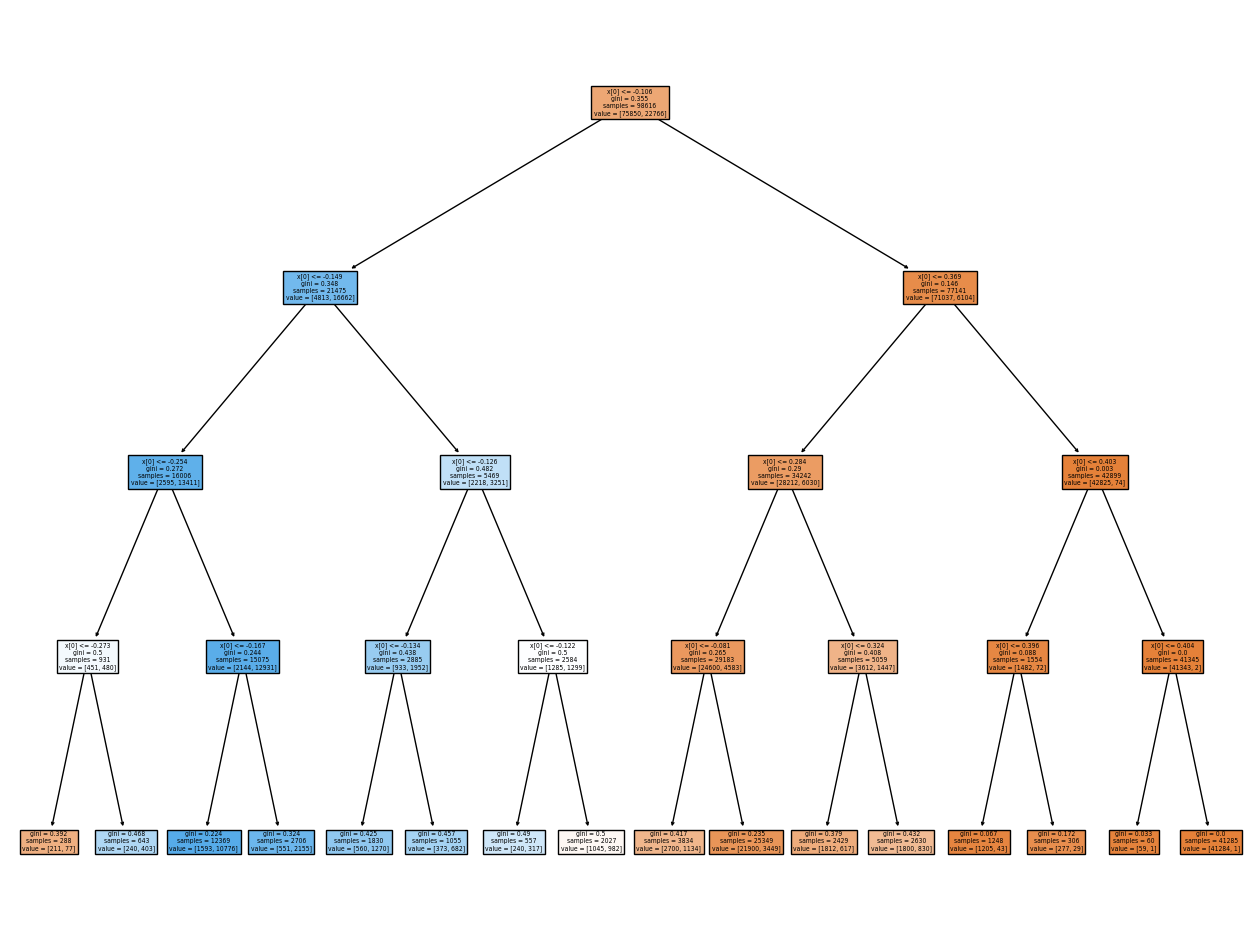

In [160]:
# Import sklearn along with all necessary modules

import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score,mean_squared_error

# Initiate a tree model
tree_depth = 4
min_sample_split= 2
min_samples_leaf= 4
model_tree = DecisionTreeClassifier(max_depth=tree_depth, min_samples_split=min_sample_split, min_samples_leaf=min_samples_leaf)

# Fit the model to your data.
# Please note that the output of this fitting is a model with several parameters that are configurable, so far you only configured "max_depth" while training/fitting.
model_tree.fit(X_train, Y_train)

# Visualize split
fig = plt.figure(figsize=(tree_depth*4,tree_depth*3))
tree.plot_tree(model_tree, filled=True)

In [161]:
Y_pred = pd.Series(list(model_tree.predict(X_test[:,0].reshape(-1,1))), name='DT prediction')  # Store the predicted value in Y_pred
Y_actu = pd.Series(list(Y_test), name='Manual delineation')

# Map the LULC codes to the actual name of LULC types

# First we need a mapping from the LULC codes to the actual LULC type name.
code_lulc = { 1: 'Glacier',
              2: 'Non Glacier'}

# Now replace the non-intuitive numbers with actual LULC type names and store them into new variables
Y_actu2 = Y_actu.replace(code_lulc)
Y_pred2 = Y_pred.replace(code_lulc)

# Show the LULC coded confusion matrix
df_confusion2 = pd.crosstab(Y_actu2, Y_pred2)
df_confusion2

DT prediction,Glacier,Non Glacier
Manual delineation,,
Glacier,168386,8455
Non Glacier,17105,36160


In [162]:
# Print out more detailed accuracy assessment report

from sklearn.metrics import classification_report

print(classification_report(Y_actu2, Y_pred2))

              precision    recall  f1-score   support

     Glacier       0.91      0.95      0.93    176841
 Non Glacier       0.81      0.68      0.74     53265

    accuracy                           0.89    230106
   macro avg       0.86      0.82      0.83    230106
weighted avg       0.89      0.89      0.89    230106



In [ ]:
# SKIP

# The tree can also be visualized in a different way to see how data has been splitted.
# Let's plot how the features split the data

# Plot parameters
plot_colors = "ryb"
plot_step = 100

# Plot the decision boundary
plt.figure(figsize=(6, 6))

x_min, x_max = X_test[:, 0].min() - 1000, X_test[:, 0].max() + 1000
y_min, y_max = X_test[:, 1].min() - 1000, X_test[:, 1].max() + 1000
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = model_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Blues)

plt.xlabel('feature_1')
plt.ylabel('feature_2')

plt.scatter(X_test[:, 0], X_test[:, 0], c=Y_test.reshape(Y_test.shape[0]), cmap='Oranges', edgecolor='black', s=45)

In [115]:

Y_pred_all = model_tree.predict(stack)

c:\Users\k\anaconda3\envs\ssml\lib\site-packages\geopandas\plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


Printing large image takes time...


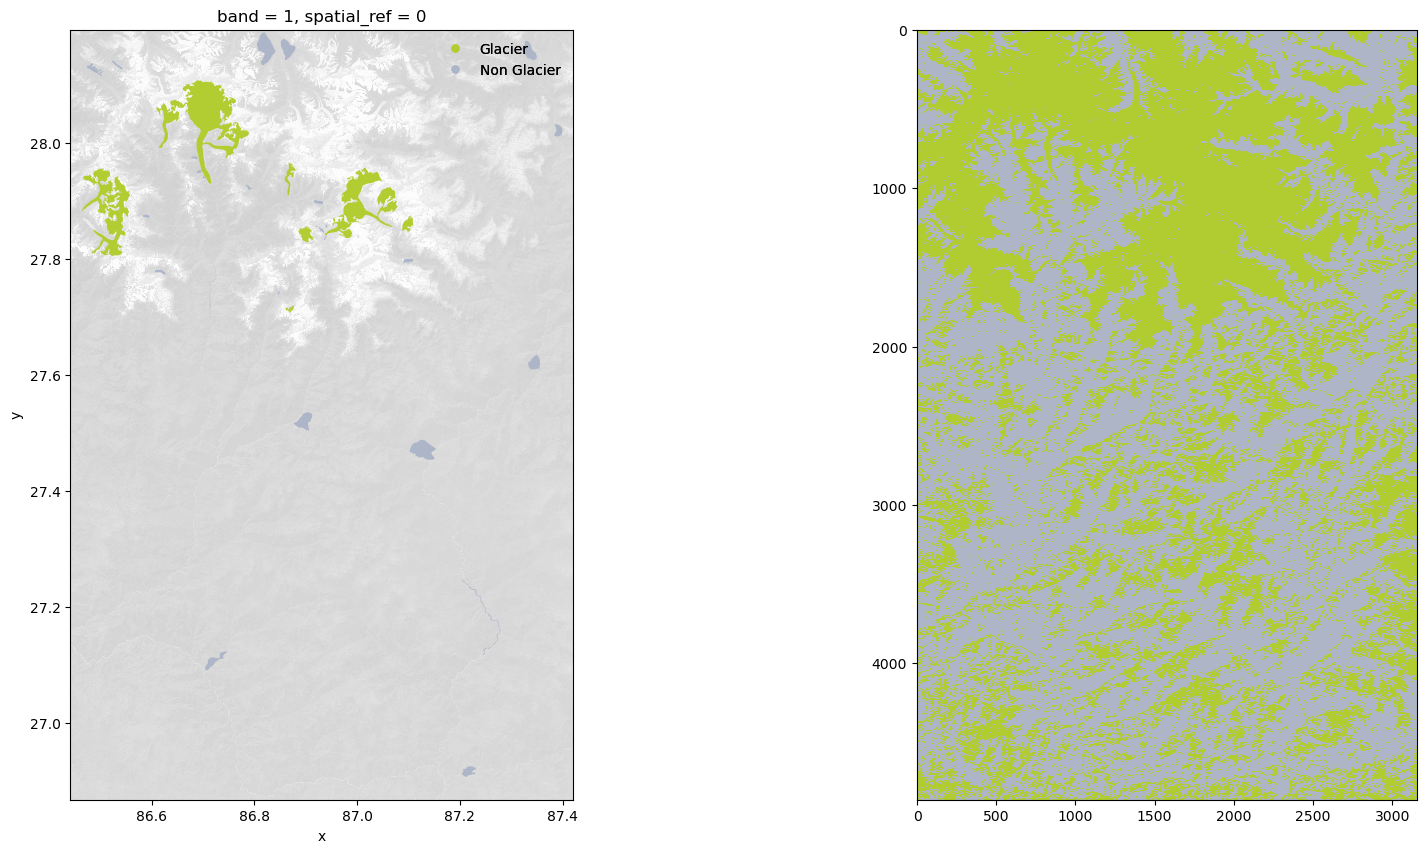

In [116]:
# Visualize
fig1,(ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
d.plot(ax=ax1, cmap='gray', alpha=0.25, add_colorbar=False)  # Plot the satellite image
aoi.plot(ax=ax1, column='land_cover', legend=True, color=aoi['is_glacier'].map(symbology))

from matplotlib.lines import Line2D
custom_points = [Line2D([0], [0], marker="o", linestyle="none", markersize=5, color=color) for color in symbology.values()]
leg_points = ax1.legend(custom_points, symbology.keys(), loc='upper right', frameon=False)
ax1.add_artist(leg_points)

# Assign color codes to LULC types 
symbology2 = {1: cols[5],
              2: cols[0]}

from matplotlib.colors import ListedColormap
cm = ListedColormap(symbology2.values())
imin = min(symbology2)  # Colormap range
imax = max(symbology2)

# Visualize
# Because the predicted labels are still in one column, you need to reshape it back to original image shape
row, col = d.shape  # Get the original dimensions of the image
imin = min(symbology2)  # Colormap range
imax = max(symbology2)

print('Printing large image takes time...')
ax2.imshow(Y_pred_all.reshape(row, col), cmap=cm, interpolation='none', vmin=imin, vmax=imax)

# Logistic regression

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# Load the iris dataset
iris = load_iris()

# Create a logistic regression object
lr = LogisticRegression()

# Define the hyperparameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'max_iter': [100, 500, 1000]}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)



Best hyperparameters:  {'C': 0.01, 'max_iter': 100}


In [156]:
from sklearn.linear_model import LogisticRegression

# It is not binary classification anymore.
# To achieve the multi-class classification, you can each time classify each class out of the rest of the data.
# This is called the 'one-versus-rest' or 'one-versus-all' (OVR) classification scheme.
log = LogisticRegression(C=0.01, max_iter=100)
Y_pred2 = log.fit(X_train, Y_train).predict(stack)

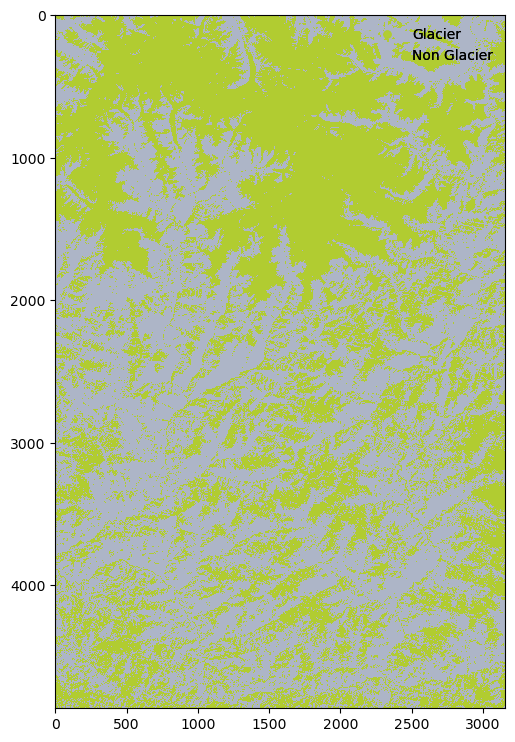

In [157]:
# Visualize the classification results.

# Assign color codes to LULC types 
# Assign color codes to LULC types 
symbology2 = {1: cols[5],
              2: cols[0]}

from matplotlib.colors import ListedColormap
cm = ListedColormap(symbology2.values())
imin = min(symbology2)  # Colormap range
imax = max(symbology2)


row, col = d.shape  # Get the original dimensions of the image 

fig,ax = plt.subplots(1,1, figsize=(9,9))
ax.imshow(Y_pred2.reshape(row, col), cmap=cm, interpolation='none', vmin=imin, vmax=imax)

from matplotlib.lines import Line2D
custom_points = [Line2D([0], [0], marker="o", linestyle="none", markersize=5, color=color) for color in symbology.values()]
leg_points = ax.legend(custom_points, symbology.keys(), loc='upper right', frameon=False)
ax.add_artist(leg_points)

# Validation of NDSI

In [88]:
#open validation AOI
aoi_v = gpd.read_file("data/Val/Classifications/Glaciers1999.shp")
aoi_v = aoi[['layer', 'is_glacier', 'geometry']]

aoi_v['is_glacier'].loc[aoi_v['is_glacier']==0] = 2
aoi_v



# #rasterize validation AOI

# # Labels from the AOIs
# aoi_v['aoi_cat'] = pd.Categorical(aoi_v['is_glacier'])

# # Rasterize
# rst = rasterio.open('data/validation_data_resampledNDSI.tif')  # Base image to rasterize the *.shp
# meta = rst.meta.copy()  # Copy metadata from the base image
# meta.update(compress='lzw')

# # Burn the AOIs *.shp file into raster and save it
# out_rst = 'data/Val/aoi_rasterized.tif'
# with rasterio.open(out_rst, 'w+', **meta) as out:
#     out_arr = out.read(1)

#     # Create a generator of geom, value pairs to use in rasterizing
#     shapes = ((geom,value) for geom, value in zip(aoi_v.geometry, aoi_v.aoi_cat))

#     burned = features.rasterize(shapes=shapes, fill=0, out=out_arr, transform=out.transform)
#     out.write_band(1, burned)



# Y_pred_validation = model_tree.predict(stack)

C:\Users\k\AppData\Local\Temp\ipykernel_10968\4187696927.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aoi_v['is_glacier'].loc[aoi_v['is_glacier']==0] = 2


,layer,is_glacier,geometry
0,None,Non Glacier,"POLYGON Z ((87.13746 27.45352 0.00000, 87.1366..."
1,None,Non Glacier,"POLYGON Z ((86.87635 27.51712 0.00000, 86.8763..."
2,None,Non Glacier,"POLYGON Z ((87.34924 27.63508 0.00000, 87.3492..."
3,None,Non Glacier,None
4,None,Non Glacier,"POLYGON Z ((86.71044 27.10873 0.00000, 86.7105..."
...,...,...,...
118,None,Non Glacier,"POLYGON Z ((86.47362 28.13161 0.00000, 86.4744..."
119,None,Non Glacier,"POLYGON Z ((87.34172 28.19500 0.00000, 87.3419..."
120,None,Non Glacier,"POLYGON Z ((87.30722 28.12600 0.00000, 87.3075..."
121,None,Non Glacier,"POLYGON Z ((87.30358 28.16715 0.00000, 87.3037..."


In [76]:
file_location = 'data/validation_data_resampledNDSI.tif'
d = rioxarray.open_rasterio(file_location).squeeze() 

d  # Show data information

stack = np.array([])

print(d.shape)  # Each time, also check the size of the image
    
# In order to do clustering, image should be reshaped into a single column
band_col = d.values.reshape(-1, 1)
   
# Each time put the reshaped image into the stack
stack = np.hstack((stack, band_col)) if stack.size else band_col
# Also to check the size of the stack
print(stack.shape)

(4860, 3159)
(15352740, 1)


In [77]:
# Load the rasterized LULC types in the AOI and concatenate it together with the images

aoi_rst = rasterio.open('data/Val/aoi_rasterized.tif').read(1)

# Stack the label with the input bands
data = np.c_[stack, aoi_rst.reshape(-1,)]

# Of course, we are only interested in pixels with LULC type labelled
data = data[np.where(data[:,data.shape[1]-1]!=0)]
#print(data)

In [80]:
aoi['is_glacier'].loc[aoi['is_glacier'] == 1] = 'Glacier'
aoi['is_glacier'].loc[aoi['is_glacier'] == 2] = 'Non Glacier'
aoi

C:\Users\k\AppData\Local\Temp\ipykernel_10968\2742753793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aoi['is_glacier'].loc[aoi['is_glacier'] == 1] = 'Glacier'


,layer,is_glacier,geometry,aoi_cat
0,None,Non Glacier,"POLYGON Z ((87.13746 27.45352 0.00000, 87.1366...",2
1,None,Non Glacier,"POLYGON Z ((86.87635 27.51712 0.00000, 86.8763...",2
2,None,Non Glacier,"POLYGON Z ((87.34924 27.63508 0.00000, 87.3492...",2
3,None,Non Glacier,None,2
4,None,Non Glacier,"POLYGON Z ((86.71044 27.10873 0.00000, 86.7105...",2
...,...,...,...,...
118,None,Non Glacier,"POLYGON Z ((86.47362 28.13161 0.00000, 86.4744...",2
119,None,Non Glacier,"POLYGON Z ((87.34172 28.19500 0.00000, 87.3419...",2
120,None,Non Glacier,"POLYGON Z ((87.30722 28.12600 0.00000, 87.3075...",2
121,None,Non Glacier,"POLYGON Z ((87.30358 28.16715 0.00000, 87.3037...",2


In [78]:
Y_pred_valid = model_tree.predict(stack)

c:\Users\k\anaconda3\envs\ssml\lib\site-packages\geopandas\plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


ValueError: Invalid RGBA argument: nan

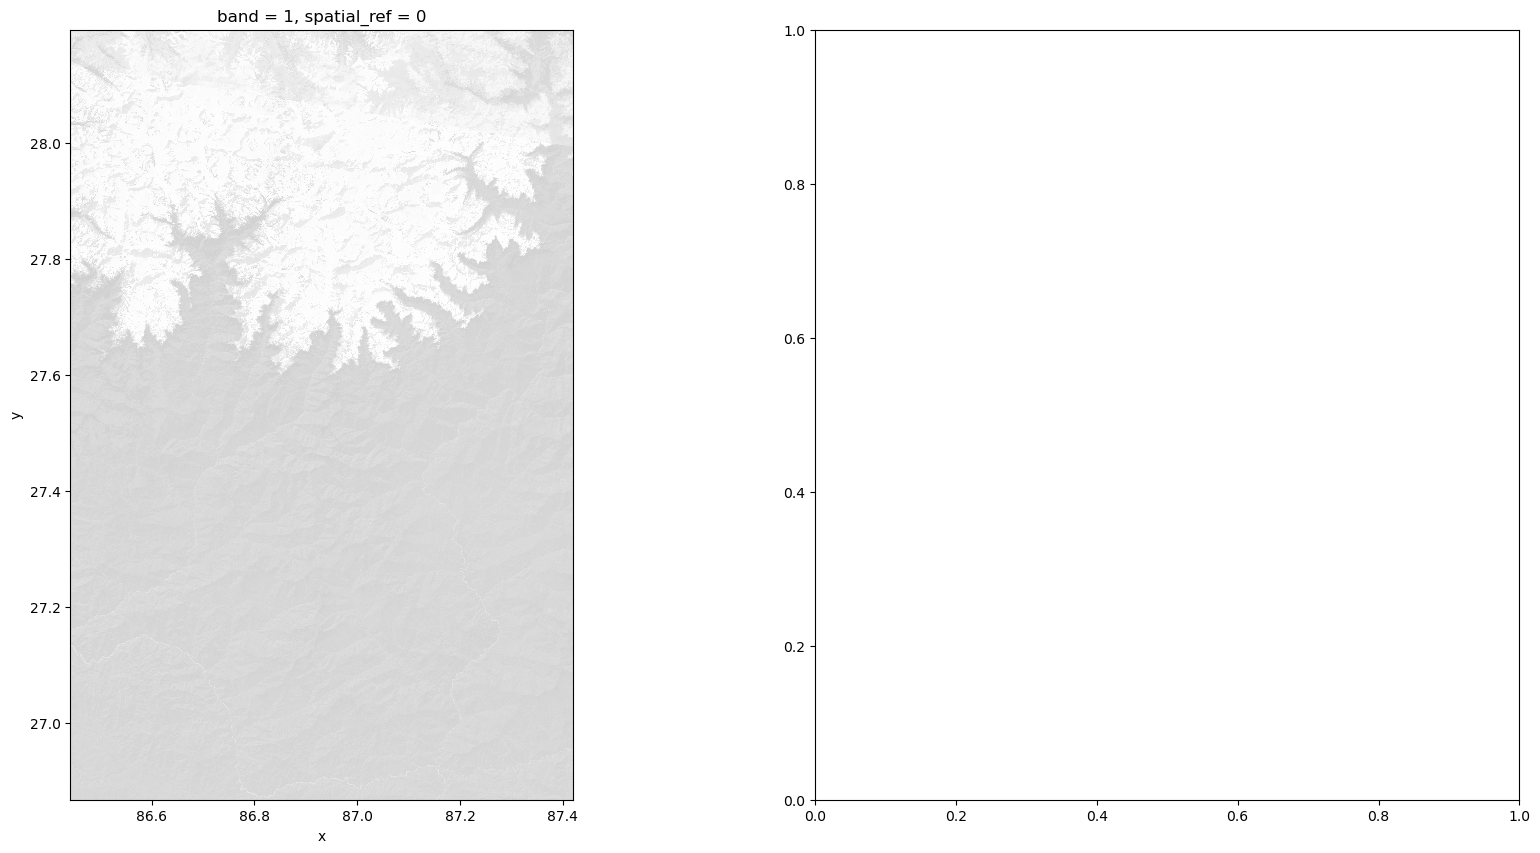

In [79]:
# Visualize
fig1,(ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
d.plot(ax=ax1, cmap='gray', alpha=0.25, add_colorbar=False)  # Plot the satellite image
aoi.plot(ax=ax1, column='land_cover', legend=True, color=aoi['is_glacier'].map(symbology))

from matplotlib.lines import Line2D
custom_points = [Line2D([0], [0], marker="o", linestyle="none", markersize=5, color=color) for color in symbology.values()]
leg_points = ax1.legend(custom_points, symbology.keys(), loc='upper right', frameon=False)
ax1.add_artist(leg_points)

# Assign color codes to LULC types 
symbology2 = {1: cols[5],
              2: cols[0]}

from matplotlib.colors import ListedColormap
cm = ListedColormap(symbology2.values())
imin = min(symbology2)  # Colormap range
imax = max(symbology2)

# Visualize
# Because the predicted labels are still in one column, you need to reshape it back to original image shape
row, col = d.shape  # Get the original dimensions of the image
imin = min(symbology2)  # Colormap range
imax = max(symbology2)

print('Printing large image takes time...')
ax2.imshow(Y_pred_valid.reshape(row, col), cmap=cm, interpolation='none', vmin=imin, vmax=imax)